In [35]:
# Import all required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
plt.style.use(["science", "ieee"])
from gic.model.oml import OceanModel
from gic.model.cables import Cable, TheoriticalSolver
from gic.model.utils import RecursiveNamespace, frexp102str
from gic.validation.simulate_synB_synT import SytheticCableAnalysis

from scipy.stats import pearsonr

In [2]:
%matplotlib inline
# Synthetic B-field plot
Bt = pd.read_csv("tmp/out/001/Bt_syn.csv")
Bt.head()

,X,dTime
0,-0.000000e+00,0
1,-2.969900e-07,1
2,-1.157880e-06,2
3,-2.538300e-06,3
4,-4.394900e-06,4


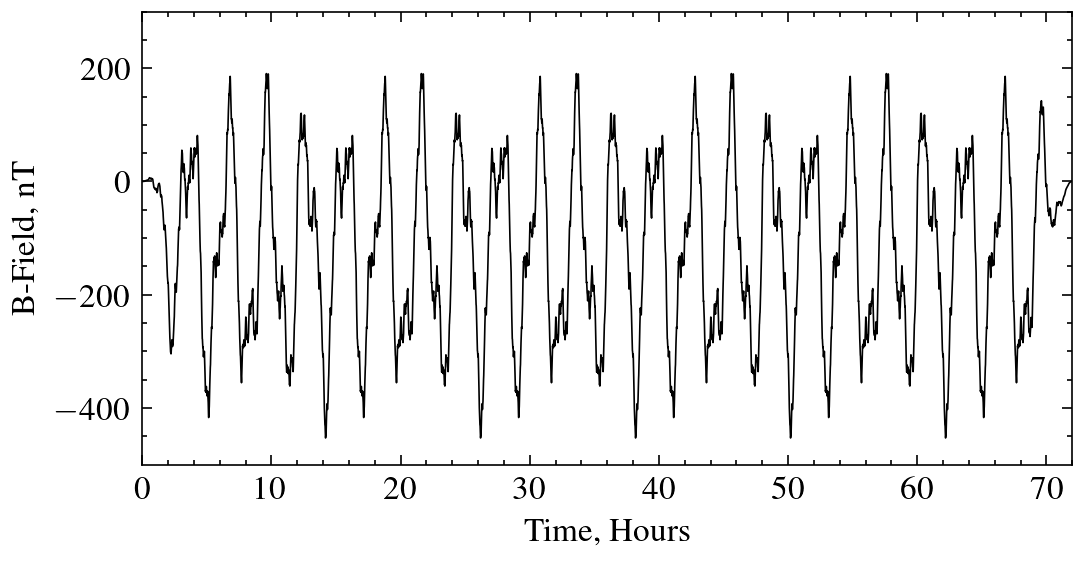

In [3]:
fig = plt.figure(dpi=240, figsize=(5,2.5))
ax = fig.add_subplot(111)
ax.plot(Bt.dTime / 3600.0, Bt.X, ls="-", lw=0.5)
ax.set_xlabel("Time, Hours")
ax.set_ylabel("B-Field, nT")
ax.set_xlim(0, 72)
_ = ax.set_ylim(-500, 300)

In [4]:
# Generate synthetic Ocean-Earth Model
thikness = np.array([4,2,10,140,254,250,340])*1e3
resistivity = np.array([0.3,3,3000,1000,100,10,1])
om = OceanModel(thikness, resistivity, flim=[1e-6,1e-2])
Tx = om.get_TFs()

2022-06-08 09:43:31.744 | INFO     | gic.model.oml:__init__:46 - Compile OM[] to calc O(floor) E- and B-Fields


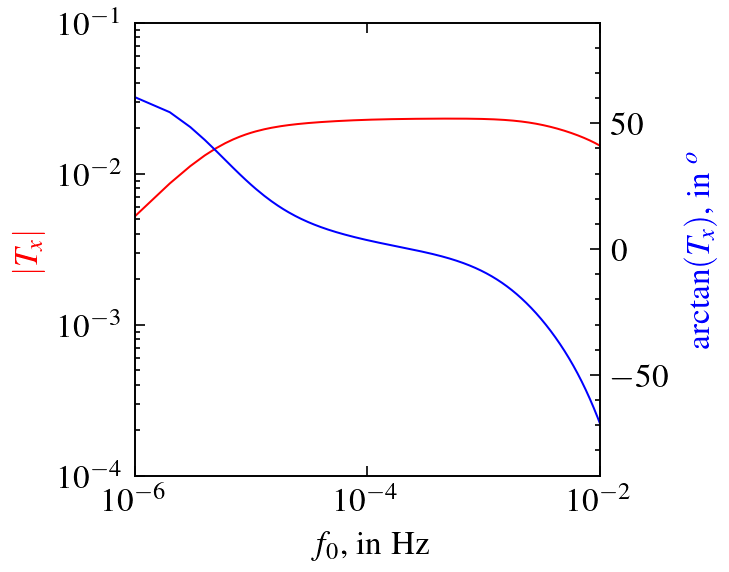

In [5]:
fig = plt.figure(dpi=240, figsize=(2.5,2.5))
ax = fig.add_subplot(111)
ax.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6, ls="-")
ax.set_xlabel(r"$f_0$, in Hz")
ax.set_ylabel(r"$|T_x|$", color="r")
ax.set_xlim(1e-6,1e-2)
ax.set_ylim(1e-4,1e-1)
ax = ax.twinx()
ax.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6, ls="-")
ax.set_ylabel(r"$\arctan(T_x)$, in $^o$", color="b")
ax.set_ylim(-90, 90)
_ = ax.set_xlim(1e-6,1e-2)

### Simulation for Uniform Earth model

In [6]:
# Input Control JSON for uniform Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],
            "Phim": [ 10, 20, 30, 40, 50, 60 ],
            "T_hours": 72
        },
        "tapering": 0.1
    },
    "cable": {
        "cable_sections": [
            {
                "sec_id": None,
                "len_km": 1000,
                "elec_params": {
                    "earth_model": "U",
                    "ocean_depth": 4000,
                    "ocean_resistivity": 0.3
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",
    "opname": "Synthetic-B"
}
scas = []
control = RecursiveNamespace(**ICJ)
sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
sca.run()
scas.append(sca)

# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],
            "Phim": [ 10, 20, 30, 40, 50, 60 ],
            "T_hours": 72
        },
        "tapering": 0.1
    },
    "cable": {
        "cable_sections": [
            {
                "sec_id": None,
                "len_km": 1000,
                "elec_params": {
                    "earth_model": "DB1",
                    "ocean_depth": 4000,
                    "ocean_resistivity": 0.3
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
sca.run()
scas.append(sca)

# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],
            "Phim": [ 10, 20, 30, 40, 50, 60 ],
            "T_hours": 72
        },
        "tapering": 0.1
    },
    "cable": {
        "cable_sections": [
            {
                "sec_id": None,
                "len_km": 1000,
                "elec_params": {
                    "earth_model": "FT1",
                    "ocean_depth": 4000,
                    "ocean_resistivity": 0.3
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
sca.run()
scas.append(sca)


2022-06-08 09:43:33.440 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-06-08 09:43:33.440 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-06-08 09:43:33.518 | INFO     | gic.model.oml:__init__:46 - Compile OM[U] to calc O(floor) E- and B-Fields
2022-06-08 09:43:33.521 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B U->OM(U)
2022-06-08 09:43:33.994 | INFO     | gic.validation.simulate_synB_synT:check_analytical_numerical:224 - Corr(Eanl,Enum): 0.9999979248
2022-06-08 09:43:40.466 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-06-08 09:43:40.466 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-06-08 09:43:40.529 | INFO     | gic.model.oml:__init__:46 - Compile OM[DB1] to calc O(floor) E- and B-Fields
2022-06-08 09:43:40.532 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B DB1->OM(DB1)
2022-06-08

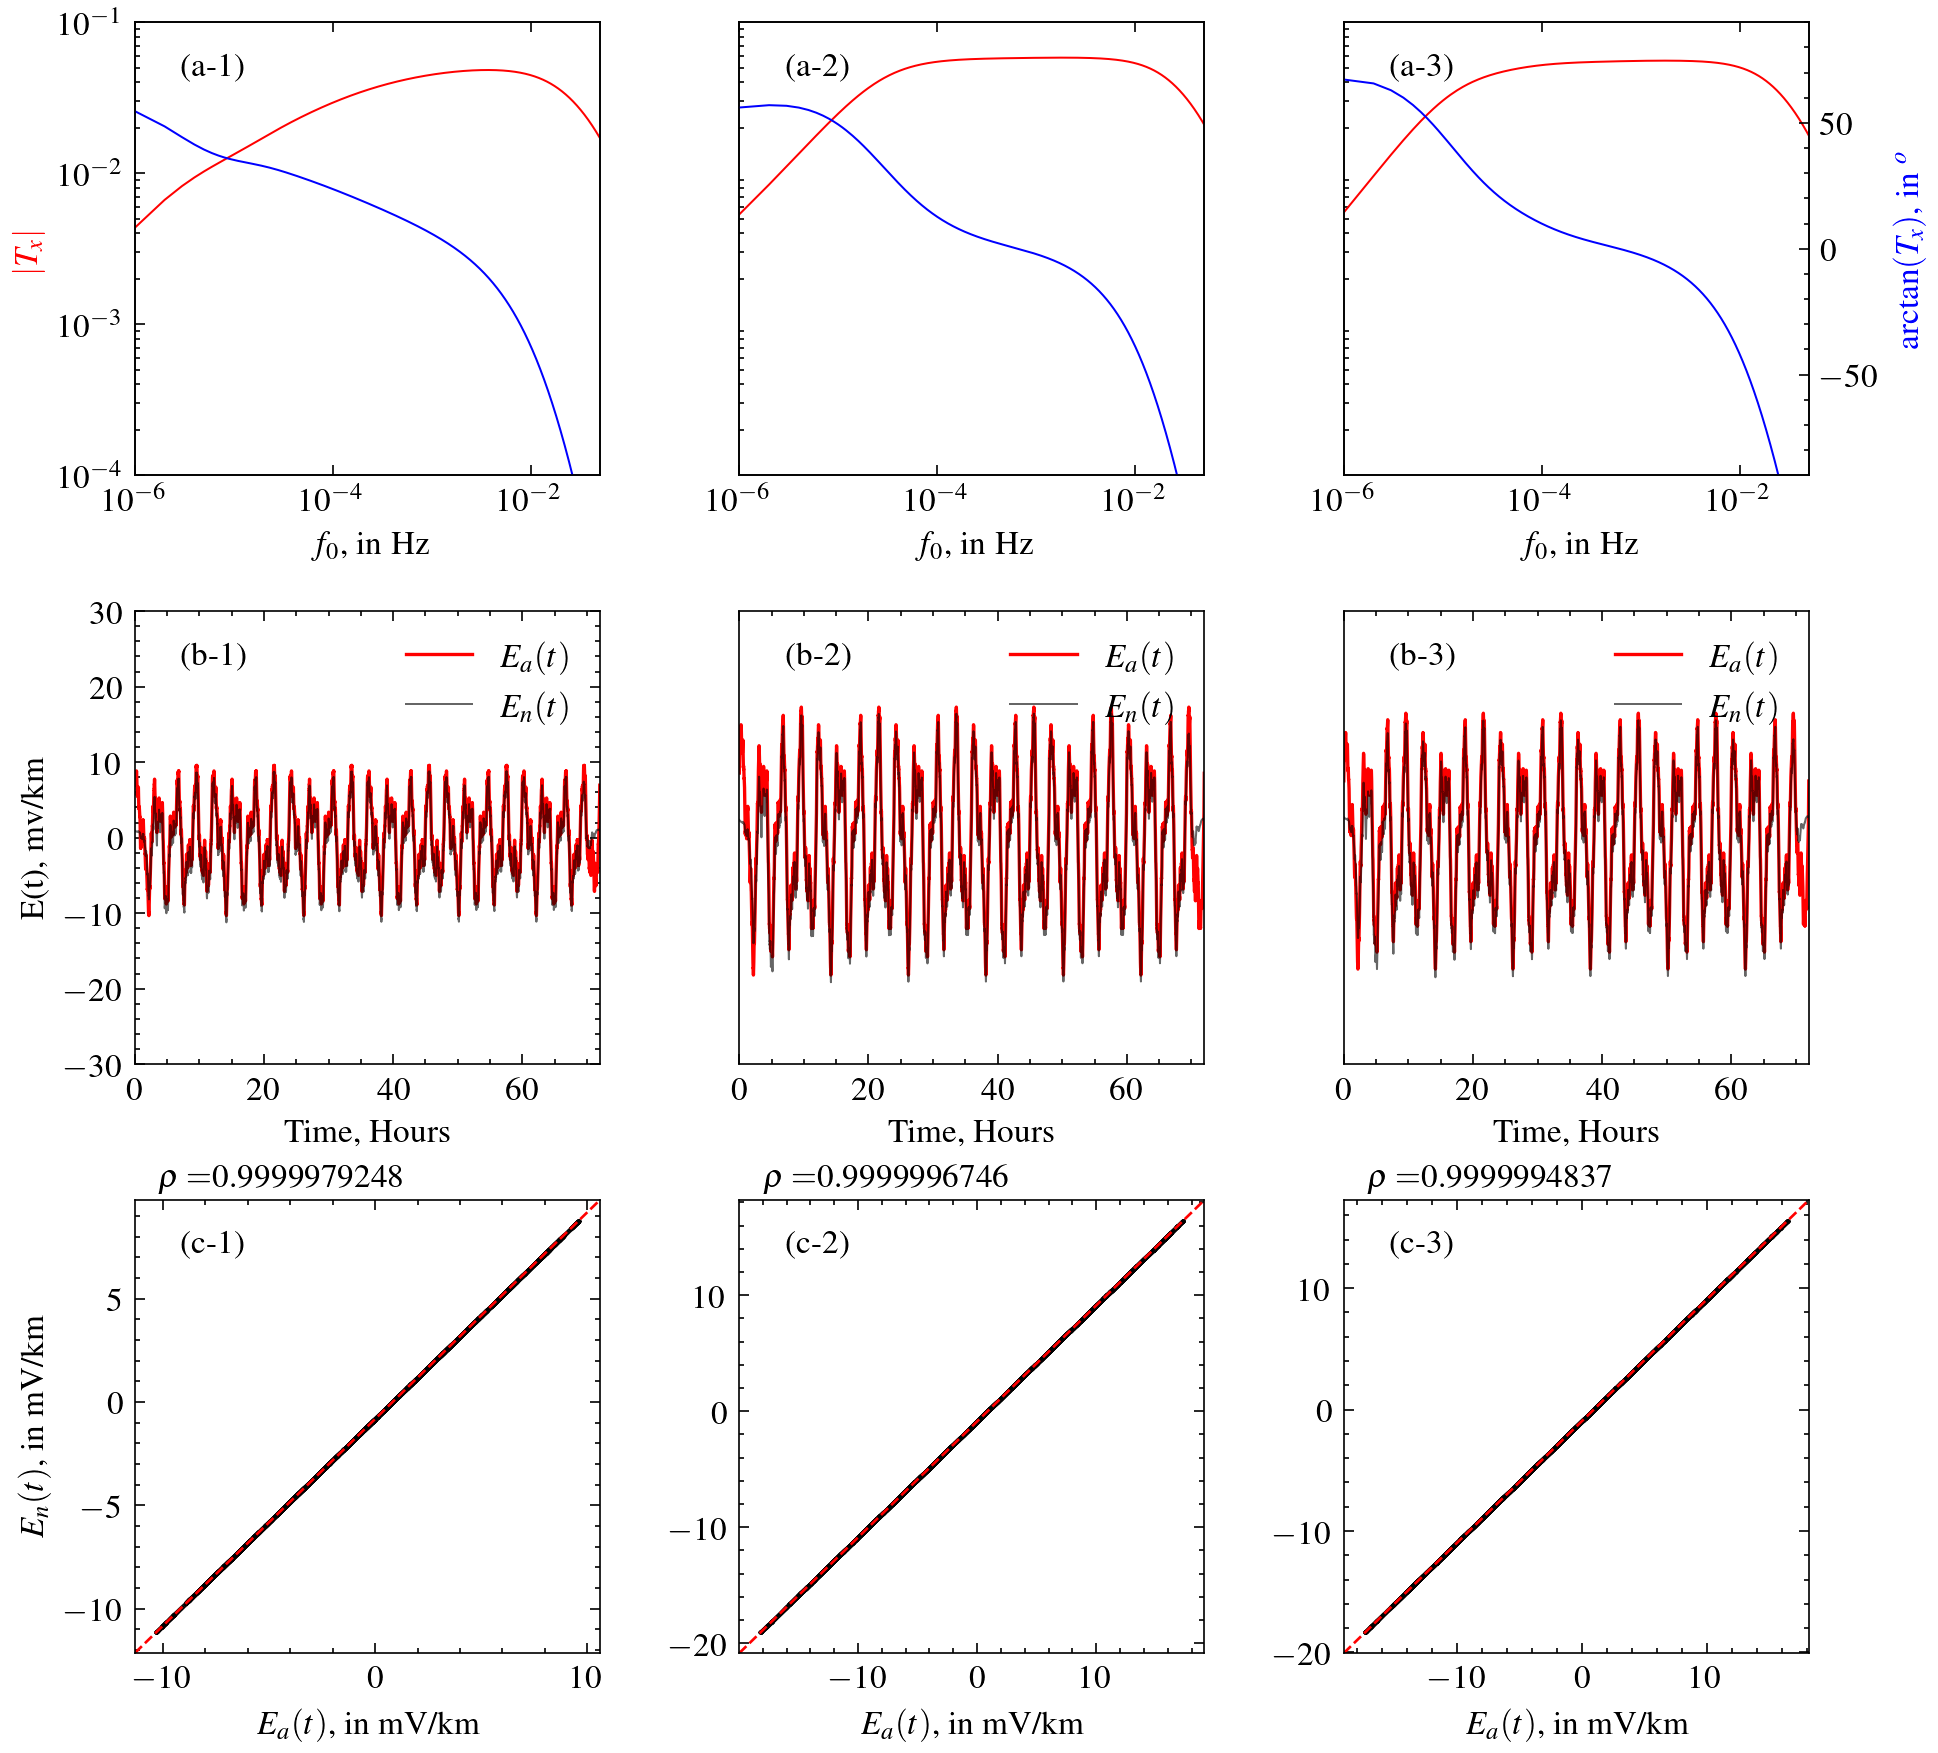

In [7]:
fig = plt.figure(dpi=240, figsize=(9,9))
labels = ["(a-1)", "(a-2)", "(a-3)"]
for i in range(3):
    ax = fig.add_subplot(331+i)
    om = scas[i].cable.cable_sections[0].cs_oml
    Tx = om.get_TFs()
    ax.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6)
    ax.set_xlabel(r"$f_0$, in Hz")
    if i==0: ax.set_ylabel(r"$|T_x|$", color="r")
    else: ax.set_yticks([])
    ax.text(0.1, 0.9, labels[i], va="center", ha="left", transform=ax.transAxes)
    ax.set_ylim(1e-4,1e-1)
    axt = ax.twinx()
    axt.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6)
    if i==2: axt.set_ylabel(r"$\arctan(T_x)$, in $^o$", color="b")
    else: axt.set_yticks([])
    axt.set_ylim(-90, 90)    
    _ = axt.set_xlim(1e-6,5e-2)
    
labels = ["(b-1)", "(b-2)", "(b-3)"]
for i in range(3):
    ax = fig.add_subplot(334+i)
    Eanl = scas[i].cable.cable_sections[0].cs_Eanl_syn
    Enum = scas[i].cable.cable_sections[0].cs_Enum_syn
    ax.plot(Eanl.dTime/3600., Eanl.X, "r", ls="-", lw=1., label=r"$E_a(t)$")
    ax.plot(Enum.dTime/3600., Enum.X, "k", ls="-", lw=0.6, label=r"$E_n(t)$", alpha=0.6)
    ax.set_xlabel("Time, Hours")
    if i==0: ax.set_ylabel("E(t), mv/km")
    else: ax.set_yticks([])
    ax.text(0.1, 0.9, labels[i], va="center", ha="left", transform=ax.transAxes)
    ax.legend(loc=1)
    ax.set_xlim(0,72)
    ax.set_ylim(-30, 30)
    
labels = ["(c-1)", "(c-2)", "(c-3)"]
for i in range(3):
    ax = fig.add_subplot(337+i)
    Eanl = scas[i].cable.cable_sections[0].cs_Eanl_syn
    Enum = scas[i].cable.cable_sections[0].cs_Enum_syn
    r = scas[i].cable.cable_sections[0].cs_r_syn
    L = int(len(Eanl)/3)
    Ea, En = Eanl.X.tolist()[L:-L], Enum.X.tolist()[L:-L]
    ax.plot(Ea, En, "ko", ms=0.1, alpha=0.4)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="r", ls="--", lw=0.8)
    ax.text(0.05, 1.05, r"$\rho=$%.10f" % r, va="center", ha="left", transform=ax.transAxes)
    ax.text(0.1, 0.9, labels[i], va="center", ha="left", transform=ax.transAxes)
    ax.set_xlabel(r"$E_a(t)$, in mV/km")
    if i==0: ax.set_ylabel(r"$E_n(t)$, in mV/km")
    #else: ax.set_yticks([])
    #ax.set_ylim(-20, 20)
    #ax.set_xlim(-20, 20)

fig.subplots_adjust(wspace=0.3, hspace=0.3)    

2022-06-08 09:52:26.616 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-06-08 09:52:26.617 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-06-08 09:52:26.618 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-06-08 09:52:26.621 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 3b048a9c-e732-11ec-bef8-2558e26e325b FT1->OM(FT1)
2022-06-08 09:52:26.622 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-06-08 09:52:26.625 | INFO     | gic.model.cables:__init__:529 - In nodal analysis for 2 nodes
2022-06-08 09:52:26.626 | INFO     | gic.model.cables:equivalent_nodel_analysis:542 - Eq. nodal analysis.
2022-06-08 09:52:26.626 | INFO     | gic.model.cables:equivalent_nodel_analysis:545 - Node:0
2022-06-08 09:52:26.627 | INFO     | gic.model.cables:equivalent_nodel_analysis:545 - Node:1
2022-06-08 09:52:26.628 | INFO     | gic.model.cable

Text(0.9, 0.2, '$\\rho=0.9999999989$')

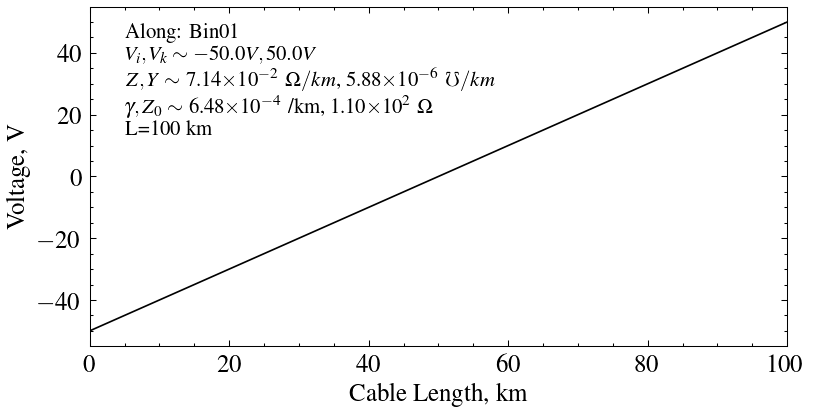

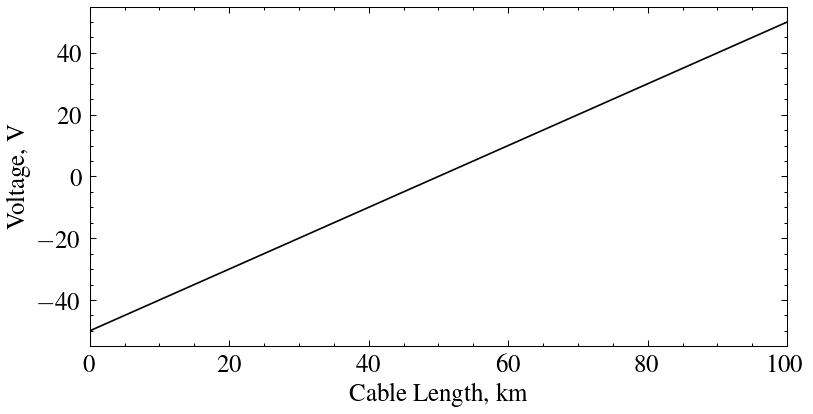

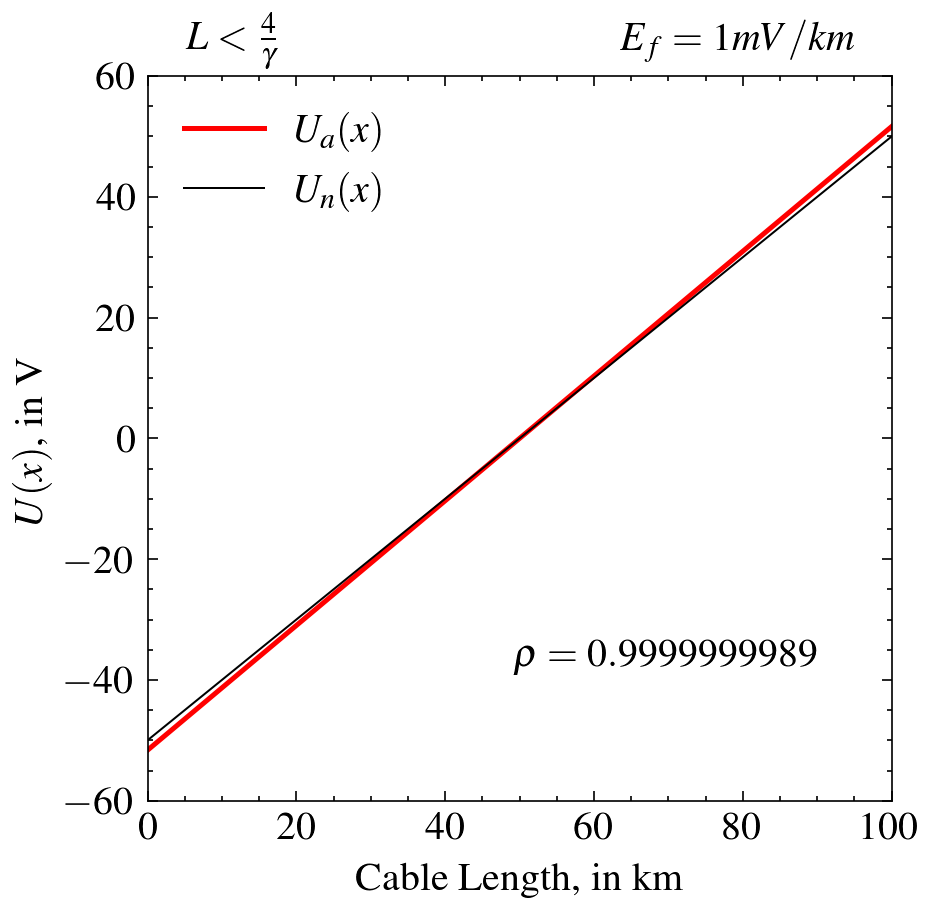

In [28]:
e = pd.DataFrame()
e["X"], e["dTime"] = [1], [0] # inputs is in mV/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 100.
            },
            "elec_params":{
                "earth_model": "FT1",
                "ocean_depth": 4000,
                "ocean_resistivity": 0.3
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
txcable = Cable(cable, Efields, None, ["X"], "tmp/out/002/")
txcable.run_nodal_analysis()

ths = TheoriticalSolver(6.48e-4, 100., 1.0)
xs, Uxs = ths.calculate_electrically_short()
fig = plt.figure(dpi=240, figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(xs, Uxs, "r", lw=1.5, ls="-", label=r"$U_a(x)$")
ax.set_xlabel(r"Cable Length, in km")
ax.text(0.05, 1.05, r"$L<\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.05, r"$E_f=1 mV/km$", ha="right", va="center", transform=ax.transAxes)
ax.set_ylabel(r"$U(x)$, in V")
ax.set_ylim(-60, 60)
ax.set_xlim(0, 100)
#ax.plot(xs, Uxs, "r", lw=0.6, ls="-")
U0, U1 = txcable.nodal_analysis.get_voltage_ends_of_cable_section(
                0, txcable.components[0]
            )
U0, U1 = U0[0], U1[0]
V, Lx = txcable.tx_lines[0].calculate_potential_along_cable_section(U0, U1)
ax.plot(Lx, V, "k", lw=0.6, ls="-", label=r"$U_n(x)$")
ax.legend(loc=2)
r, _= pearsonr(V, Uxs[::10])
ax.text(0.9, 0.2, r"$\rho=%.10f$"%r, ha="right", va="center", transform=ax.transAxes)

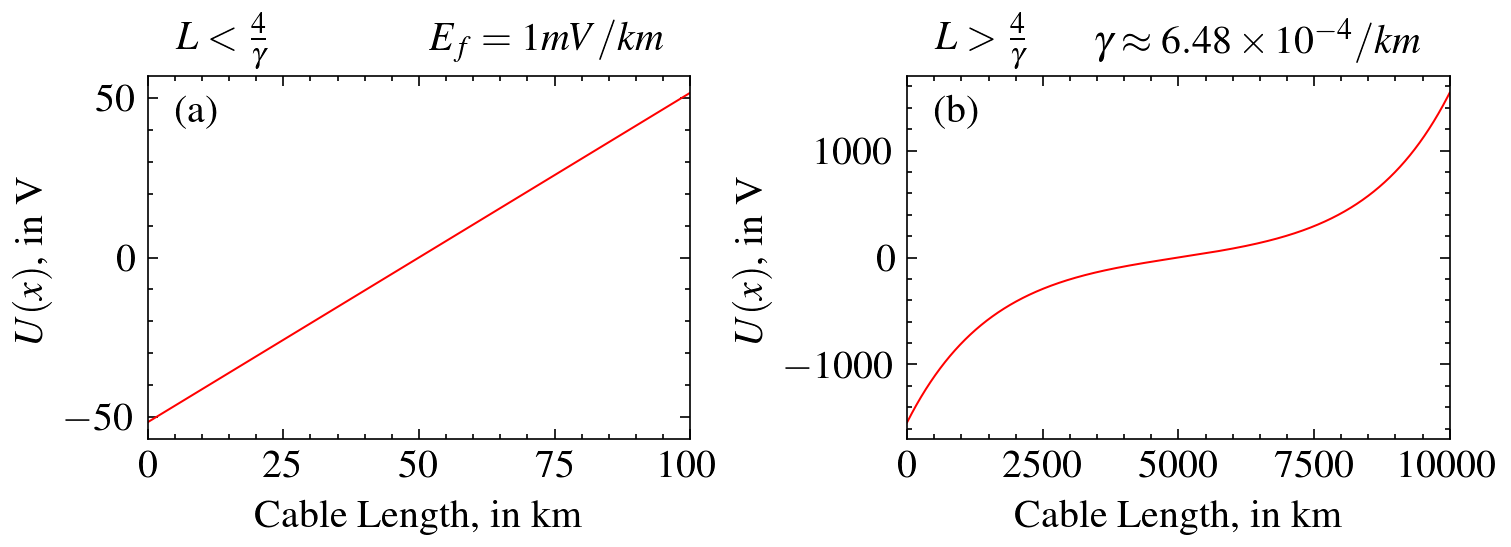

In [9]:
# Short Cable
ths = TheoriticalSolver(6.48e-4, 100., 1.0)
xs, Uxs = ths.calculate_electrically_short()
thl = TheoriticalSolver(6.48e-4, 10000., 1.0)
xl, Uxl = thl.calculate_electrically_long()
fig = plt.figure(dpi=240, figsize=(7,2))
ax = fig.add_subplot(121)
ax.plot(xs, Uxs, "r", lw=0.6, ls="-")
ax.set_xlabel(r"Cable Length, in km")
ax.text(0.05, 1.1, r"$L<\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.1, r"$E_f=1 mV/km$", ha="right", va="center", transform=ax.transAxes)
ax.set_ylabel(r"$U(x)$, in V")
ax.text(0.05, 0.9, "(a)", ha="left", va="center", transform=ax.transAxes)
ax.set_xlim(0,100)
#ax.set_ylim(-0.15,0.15)
ax = fig.add_subplot(122)
ax.plot(xl, Uxl, "r", lw=0.6, ls="-")
ax.set_xlabel(r"Cable Length, in km")
ax.set_ylabel(r"$U(x)$, in V")
ax.set_xlim(0,10000)
#ax.set_ylim(-1.6,1.6)
ax.text(0.05, 1.1, r"$L>\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.1, r"$\gamma\approx 6.48\times 10^{-4}/km$", ha="right", va="center", transform=ax.transAxes)
ax.text(0.05, 0.9, "(b)", ha="left", va="center", transform=ax.transAxes)
fig.subplots_adjust(wspace=0.4)

2022-06-08 09:53:27.835 | WARNING  | gic.model.cables:setup:398 - Into cable setup section
2022-06-08 09:53:27.836 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2022-06-08 09:53:27.836 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-06-08 09:53:27.839 | INFO     | gic.model.cables:compile_oml:221 - Synthetic 5f81bda4-e732-11ec-bef8-2558e26e325b FT1->OM(FT1)
2022-06-08 09:53:27.839 | INFO     | gic.model.cables:calc_trasmission_line_parameters:248 - Cable width: 1.0
2022-06-08 09:53:27.958 | INFO     | gic.model.cables:__init__:529 - In nodal analysis for 2 nodes
2022-06-08 09:53:27.959 | INFO     | gic.model.cables:equivalent_nodel_analysis:542 - Eq. nodal analysis.
2022-06-08 09:53:27.960 | INFO     | gic.model.cables:equivalent_nodel_analysis:545 - Node:0
2022-06-08 09:53:27.961 | INFO     | gic.model.cables:equivalent_nodel_analysis:545 - Node:1
2022-06-08 09:53:27.961 | INFO     | gic.model.cable

0.9529097976185532


Text(0.9, 0.2, '$\\rho=0.9529097976$')

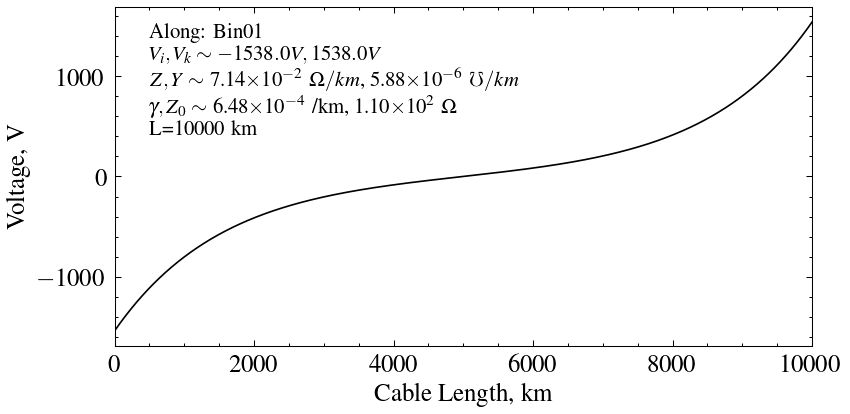

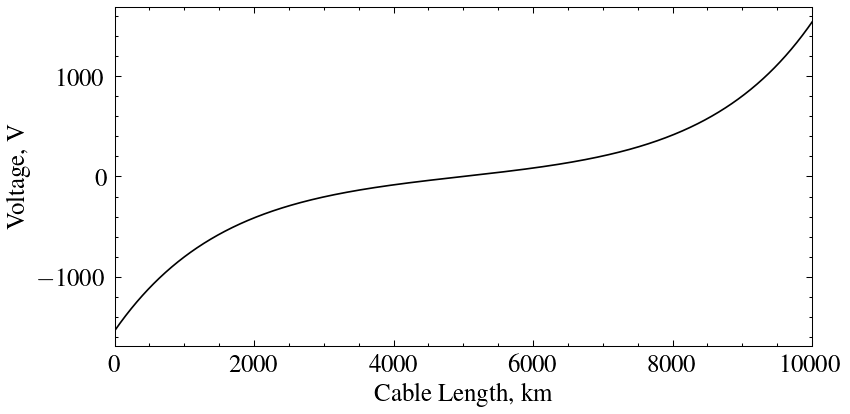

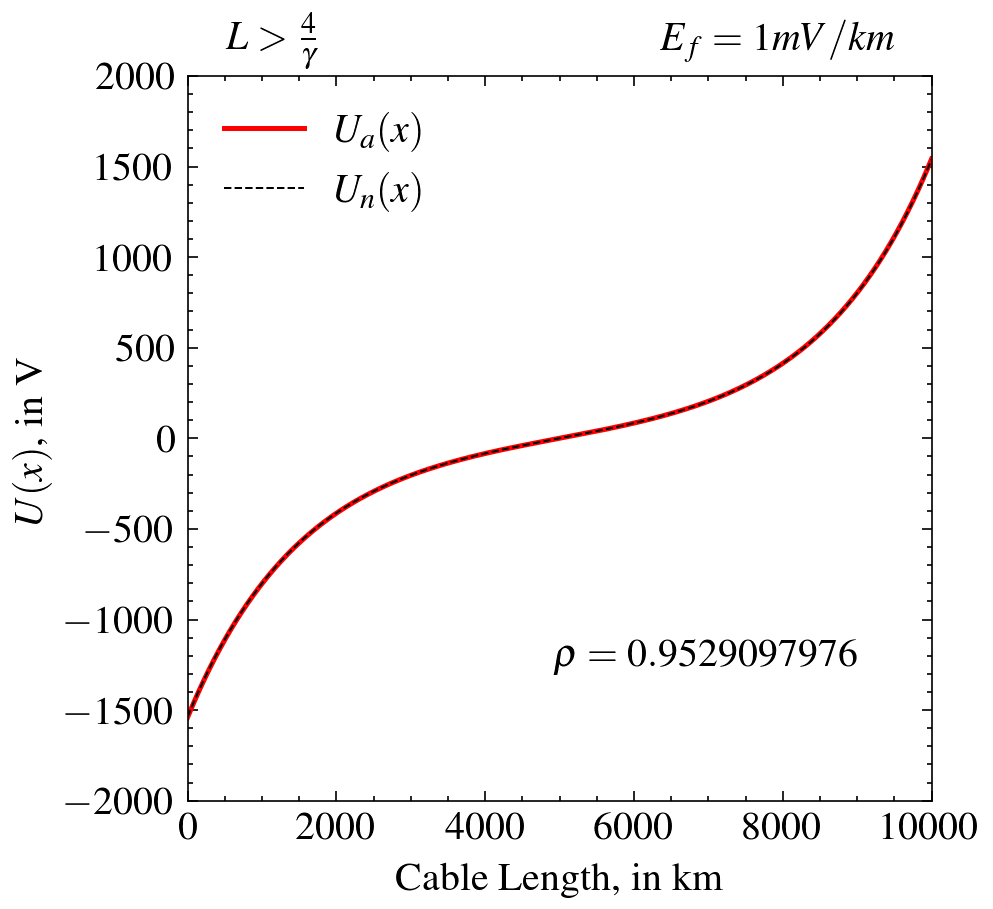

In [32]:
e = pd.DataFrame()
e["X"], e["dTime"] = [1], [0] # inputs is in mV/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 10000.
            },
            "elec_params":{
                "earth_model": "FT1",
                "ocean_depth": 4000,
                "ocean_resistivity": 0.3
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
txcable = Cable(cable, Efields, None, ["X"], "tmp/out/002/")
txcable.run_nodal_analysis()

thl = TheoriticalSolver(6.48e-4, 10000., 1.0)
xl, Uxl = thl.calculate_electrically_long()
fig = plt.figure(dpi=240, figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(xl, Uxl, "r", lw=1.5, ls="-", label=r"$U_a(x)$")
ax.set_xlabel(r"Cable Length, in km")
ax.text(0.05, 1.05, r"$L>\frac{4}{\gamma}$", ha="left", va="center", transform=ax.transAxes)
ax.text(0.95, 1.05, r"$E_f=1 mV/km$", ha="right", va="center", transform=ax.transAxes)
ax.set_ylabel(r"$U(x)$, in V")
ax.set_ylim(-2000, 2000)
ax.set_xlim(0, 10000)
#ax.plot(xs, Uxs, "r", lw=0.6, ls="-")
U0, U1 = txcable.nodal_analysis.get_voltage_ends_of_cable_section(
                0, txcable.components[0]
            )
U0, U1 = U0[0], U1[0]
V, Lx = txcable.tx_lines[0].calculate_potential_along_cable_section(U0, U1)
ax.plot(Lx, V, "k", lw=0.6, ls="--", label=r"$U_n(x)$")
ax.legend(loc=2)
r, _= pearsonr(V, Uxs[::10])
ax.text(0.9, 0.2, r"$\rho=%.10f$"%r, ha="right", va="center", transform=ax.transAxes)

In [34]:
# Input Control JSON for Qubec Earth model
ICJ = {
    "sid": 1,
    "opcode": 0,
    "Bfield": {
        "structure": {
            "Am": [ 200, 90, 30, 17, 8, 3.5 ],
            "Tm_min": [ 180, 80, 36, 15, 8, 3 ],
            "Phim": [ 10, 20, 30, 40, 50, 60 ],
            "T_hours": 72
        },
        "tapering": 0.1
    },
    "cable": {
        "cable_sections": [
            {
                "sec_id": None,
                "len_km": 1000,
                "elec_params": {
                    "earth_model": "FT1",
                    "ocean_depth": 0,
                    "ocean_resistivity": 0.3
                }
            }
        ],
        "cable_pot_plot_index": 0
    },
    "out_dir": "tmp/out/001/",
    "opname": "Synthetic-B"
}
control = RecursiveNamespace(**ICJ)
resp = []
for d in [10, 100, 1000, 10000]:
    control.cable.cable_sections[0].elec_params.ocean_depth = d
    sca = SytheticCableAnalysis(control.Bfield, control.cable, control.out_dir)
    sca.run()
    resp.append(sca.cable.cable_sections[0].cs_oml)

2022-06-08 09:58:20.783 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-06-08 09:58:20.786 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-06-08 09:58:20.855 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-06-08 09:58:20.858 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B FT1->OM(FT1)
2022-06-08 09:58:21.273 | INFO     | gic.validation.simulate_synB_synT:check_analytical_numerical:224 - Corr(Eanl,Enum): 0.9999999961
2022-06-08 09:58:27.759 | INFO     | gic.validation.simulate_synB_synT:__init__:52 - Synthetic B-field run parameters
2022-06-08 09:58:27.760 | INFO     | gic.model.synthetic:__init__:105 - Creating B-field data
2022-06-08 09:58:27.815 | INFO     | gic.model.oml:__init__:46 - Compile OM[FT1] to calc O(floor) E- and B-Fields
2022-06-08 09:58:27.818 | INFO     | gic.validation.simulate_synB_synT:run:96 - Synthetic B FT1->OM(FT1)
2022

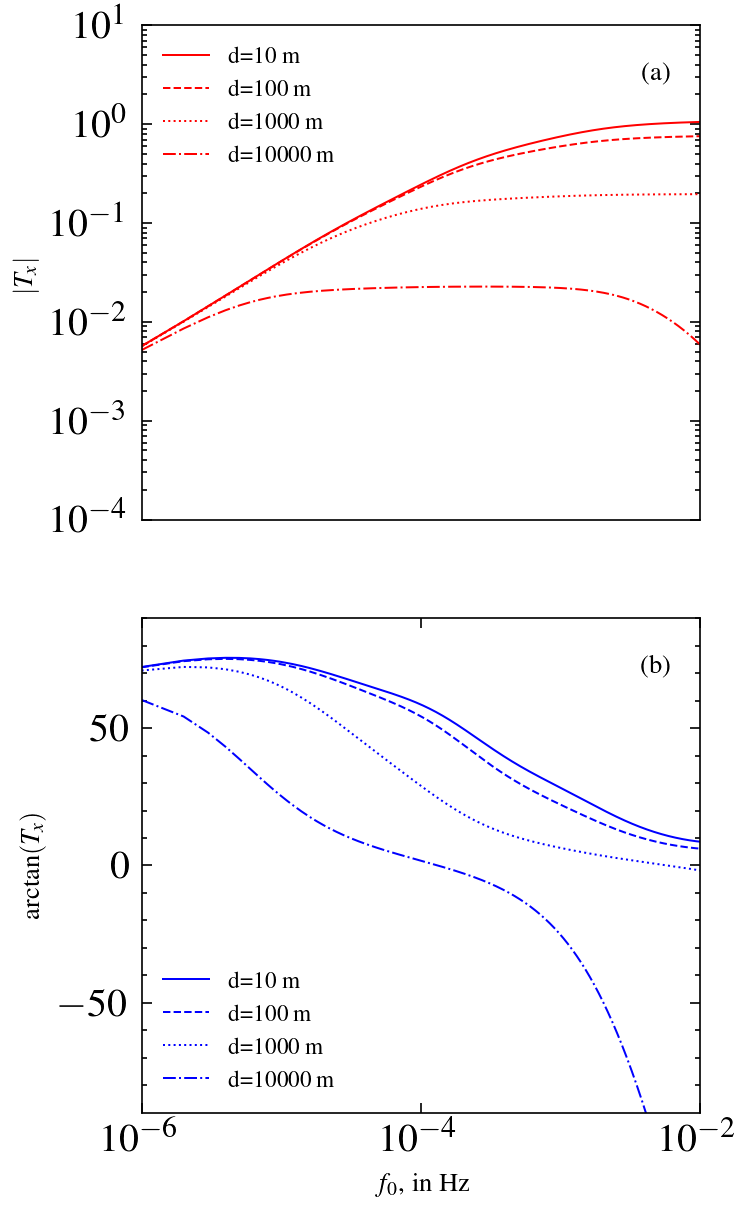

In [54]:
fig = plt.figure(dpi=240, figsize=(3,6))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for i, d in enumerate([10, 100, 1000, 10000]):
    Tx = resp[i].get_TFs()
    ax0.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6, label=r"d=%d m"%d)
    ax1.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6, label=r"d=%d m"%d)
ax0.text(0.95, 0.9, "(a)", ha="right", va="center", transform=ax0.transAxes)
ax0.set_ylabel(r"$|T_x|$")
ax0.set_xlim(1e-6, 1e-2)
ax0.set_ylim(1e-4, 1e1)
ax0.set_xticks([])
ax0.legend(loc=2, fontsize=7)
ax1.set_xlabel(r"$f_0$, in Hz")
ax1.set_ylabel(r"$\arctan(T_x)$")
ax1.set_xlim(1e-6, 1e-2)
ax1.set_ylim(-90, 90)
ax1.legend(loc=3, fontsize=7)
ax1.text(0.95, 0.9, "(b)", ha="right", va="center", transform=ax1.transAxes)
fig.subplots_adjust()